# CHAPTER 2 An array of sequences
## Overview of built-in sequences
The standard library offers a rich selection of sequence types implemented in C:
### Container sequences
list, tuple and collections.deque can hold items of different types.
### Flat sequences
str, bytes, bytearray, memoryview and array.array hold items of one type.
Container sequences hold references to the objects they contain, which may be of any
type, while flat sequences physically store the value of each item within its own memory
space, and not as distinct objects. Thus, flat sequences are more compact, but they are
limited to holding primitive values like characters, bytes and numbers
Another way of grouping sequence types is by mutability:
### Mutable sequences
list, bytearray, array.array, collections.deque and memoryview
### Immutable sequences
tuple, str and bytes

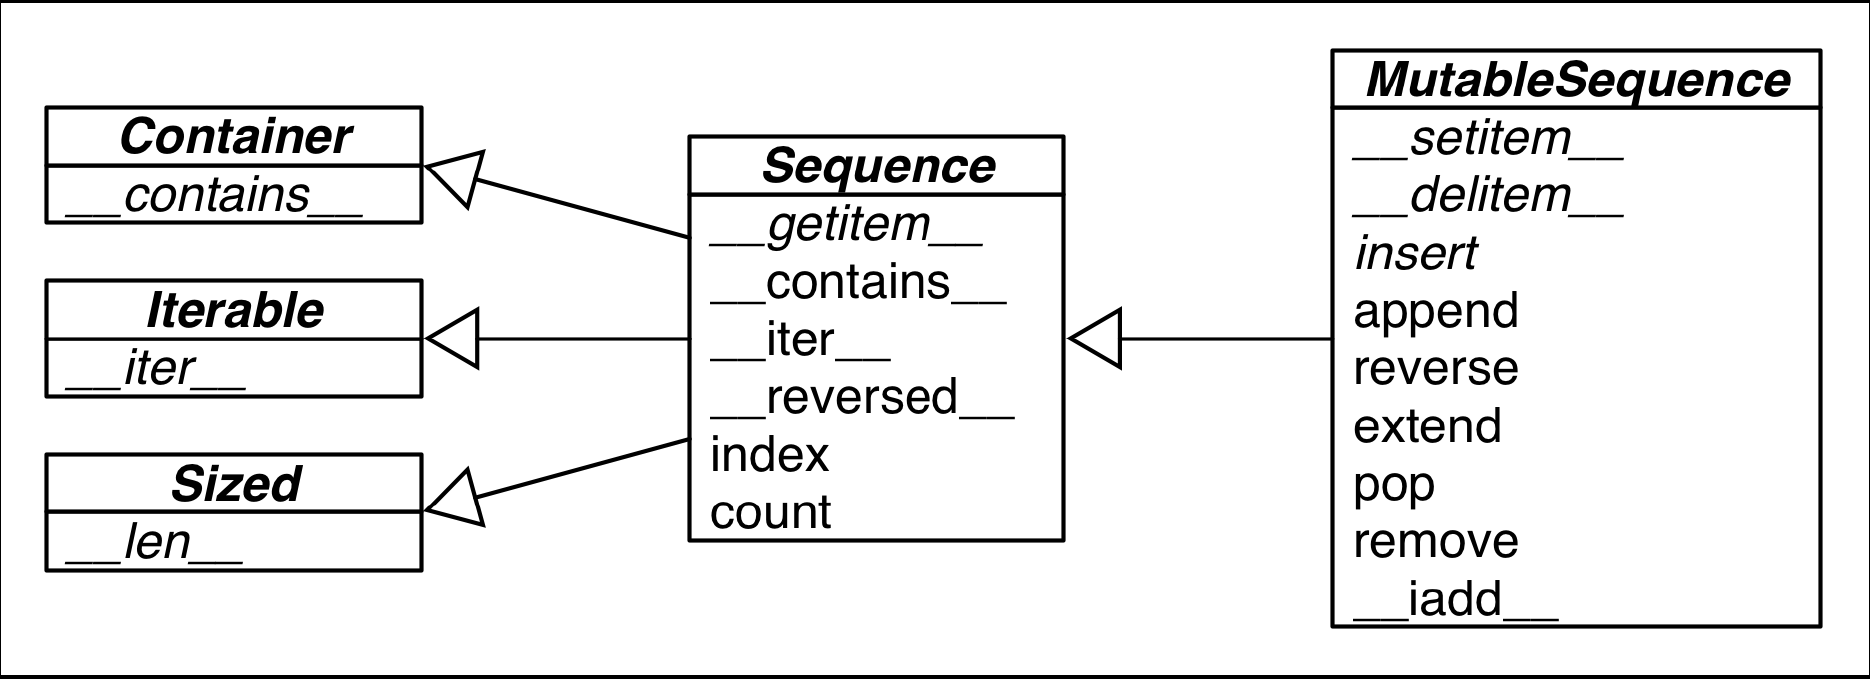

## List comprehensions and generator expressions
A quick way to build a sequence is using a list comprehension (if the target is a list)
or a generator expression (for all other kinds of sequences).

In [8]:
symbols = '$¢£¥€¤蔡强a'
codes = []
for symbol in symbols:
    codes.append(ord(symbol))
codes

[36, 162, 163, 165, 8364, 164, 34081, 24378, 97]

In [9]:
codes = [ord(symbol) for symbol in symbols]
codes

[36, 162, 163, 165, 8364, 164, 34081, 24378, 97]

### ord(c)
Given a string representing one Unicode character, return an integer representing the Unicode code point of that character. For example, ord('a') returns the integer 97 and ord('€') (Euro sign) returns 8364. This is the inverse of chr().

In Python code, line breaks are ignored inside pairs of [], {} or ().
So you can build multi-line lists, listcomps, genexps, dictionaries etc.
without using the ugly \ line continuation escape.

### Listcomps versus map and filter
### Cartesian products

In [12]:
colors = ['black', 'white']
sizes = ['S', 'M', 'L']
tshirts = [(color, size) for color in colors for size in sizes]
tshirts

[('black', 'S'),
 ('black', 'M'),
 ('black', 'L'),
 ('white', 'S'),
 ('white', 'M'),
 ('white', 'L')]

In [11]:
tshirts = [(color, size) for size in sizes for color in colors ]
tshirts

[('black', 'S'),
 ('white', 'S'),
 ('black', 'M'),
 ('white', 'M'),
 ('black', 'L'),
 ('white', 'L')]

### Generator expressions
To initialize tuples, arrays and other types of sequences, you could also start from a
listcomp but a genexp saves memory because it yields items one by one using the iterator
protocol instead of building a whole list just to feed another constructor.
Genexps use the same syntax as listcomps, but are enclosed in parenthesis rather than
brackets.

In [13]:
symbols = '$¢£¥€¤'
tuple(ord(symbol) for symbol in symbols)

(36, 162, 163, 165, 8364, 164)

In [14]:
import array
array.array('I', (ord(symbol) for symbol in symbols))

array('I', [36, 162, 163, 165, 8364, 164])

### class array.array(typecode[, initializer])
A new array whose items are restricted by typecode, and initialized from the optional initializer value, which must be a list, a bytes-like object, or iterable over elements of the appropriate type.

If given a list or string, the initializer is passed to the new array’s fromlist(), frombytes(), or fromunicode() method (see below) to add initial items to the array. Otherwise, the iterable initializer is passed to the extend() method.

In [15]:
colors = ['black', 'white']
sizes = ['S', 'M', 'L']
for tshirt in ('%s %s' % (c, s) for c in colors for s in sizes):
    print(tshirt)

black S
black M
black L
white S
white M
white L


## Tuples are not just immutable lists
Tuples do double-duty: they can be used as immutable lists and also
as records with no field names. This use is sometimes overlooked, so we will start with
that.
### Tuples as records
Tuples hold records: each item in the tuple holds the data for one field and the position
of the item gives its meaning.

In [2]:
lax_coordinates = (33.9425, -118.408056)
city, year, pop, chg, area = ('Tokyo', 2003, 32450, 0.66, 8014)
traveler_ids = [('USA', '31195855'), ('BRA', 'CE342567'),
  ('ESP', 'XDA205856')]
for passport in sorted(traveler_ids):
    print('%s/%s' % passport)

BRA/CE342567
ESP/XDA205856
USA/31195855


In [5]:
for country, _ in traveler_ids:
    print(country)

USA
BRA
ESP


### Tuple unpacking 

In [8]:
lax_coordinates = (33.9425, -118.408056)
latitude, longitude = lax_coordinates
latitude

33.9425

In [9]:
longitude

-118.408056

In [10]:
divmod(20, 8)

(2, 4)

In [11]:
t=(20,8)
divmod(*t)

(2, 4)

In [12]:
quotient, remainder = divmod(*t)
quotient, remainder

(2, 4)

In [13]:
import os
_, filename = os.path.split('/home/luciano/.ssh/idrsa.pub')
filename

'idrsa.pub'

Sometimes when we only care about certain parts of a tuple when unpacking, a dummy
variable like _ is used as placeholder, as in the example above.
28 | Chapter 2: An array of sequences

Another way of focusing on just some of the items when unpacking a tuple is to use the *, as we’ll see right away.
### Using * to grab excess items

In [14]:
a, b, *rest = range(5)
a,b,rest

(0, 1, [2, 3, 4])

In [15]:
a, b, *rest = range(3)
a,b,rest

(0, 1, [2])

In [16]:
a, b, *rest = range(2)
a,b,rest

(0, 1, [])

In [17]:
a, *body, c, d = range(5)
a, body, c, d

(0, [1, 2], 3, 4)

In [18]:
*head, b, c, d = range(5)
head, b, c, d

([0, 1], 2, 3, 4)

Finally, a powerful feature of tuple unpacking is that it works with nested structures.
### Nested tuple unpacking

In [19]:
metro_areas = [
('Tokyo', 'JP', 36.933, (35.689722, 139.691667)), #
('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
('Sao Paulo', 'BR', 19.649, (-23.547778, -46.635833))]
print('{:15} | {:^9} | {:^9}'.format('', 'lat.', 'long.'))
fmt = '{:15} | {:9.4f} | {:9.4f}'
for name, cc, pop, (latitude, longitude) in metro_areas: #
    if longitude <= 0: #
        print(fmt.format(name, latitude, longitude))

                |   lat.    |   long.  
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
Sao Paulo       |  -23.5478 |  -46.6358


#### str.format(*args, **kwargs)
Perform a string formatting operation. The string on which this method is called can contain literal text or replacement fields delimited by braces {}. Each replacement field contains either the numeric index of a positional argument, or the name of a keyword argument. Returns a copy of the string where each replacement field is replaced with the string value of the corresponding argument.
 "The sum of 1 + 2 is {0}".format(1+2)
 'The sum of 1 + 2 is 3'
 See Format String Syntax for a description of the various formatting options that can be specified in format strings.

Note When formatting a number (int, float, complex, decimal.Decimal and subclasses) with the n type (ex: '{:n}'.format(1234)), the function temporarily sets the LC_CTYPE locale to the LC_NUMERIC locale to decode decimal_point and thousands_sep fields of localeconv() if they are non-ASCII or longer than 1 byte, and the LC_NUMERIC locale is different than the LC_CTYPE locale. This temporary change affects other threads.
Changed in version 3.6.5: When formatting a number with the n type, the function sets temporarily the LC_CTYPE locale to the LC_NUMERIC locale in some cases.
### Named tuples
The collections.namedtuple function is a factory that produces subclasses
enhanced with field names and a class name — which helps debugging.

Instances of a class that you build with namedtuple take exactly the
same amount of memory as tuples because the field names are stored
in the class. They use less memory than a regular object because
they do store attributes in a per-instance __dict__.


In [20]:
from collections import namedtuple
City = namedtuple('City', 'name country population coordinates')
tokyo = City('Tokyo', 'JP', 36.933, (35.689722, 139.691667))
tokyo.name

'Tokyo'

In [21]:
tokyo.coordinates

(35.689722, 139.691667)

A named tuple type has a few attributes in addition to those inherited from tuple.
Example 2-10 shows the most useful: the _fields class attribute, the class method
_make(iterable) and the _asdict() instance method.
_fields is a tuple with the field names of the class.
_make() lets you instantiate a named tuple from an iterable; City(*delhi_da
ta) would do the same.
_asdict() returns a collections.OrderedDict built from the named tuple
instance. That can be used to produce a nice display of city data.

In [22]:
City._fields

('name', 'country', 'population', 'coordinates')

In [23]:
LatLong = namedtuple('LatLong', 'lat long')
delhi_data = ('Delhi NCR', 'IN', 21.935, LatLong(28.613889, 77.208889))
delhi = City._make(delhi_data)
delhi._asdict()

OrderedDict([('name', 'Delhi NCR'),
             ('country', 'IN'),
             ('population', 21.935),
             ('coordinates', LatLong(lat=28.613889, long=77.208889))])

### Tuples as immutable lists
## Slicing
### Why slices and range exclude the last item
The Pythonic convention of excluding the last item in slices and ranges works well with
the zero-based indexing used in Python, C and many other languages. Some convenient
features of the convention are:
• It’s easy to see the length of a slice or range when only the stop position is given:
range(3) and my_list[:3] both produce three items.
• It’s easy to compute the length of a slice or range when start and stop are given: just
subtract stop - start.
• It’s easy to split a sequence in two parts at any index x, without overlapping: simply
get my_list[:x] and my_list[x:].

In [1]:
l = [10, 20, 30, 40, 50, 60]
l[:2]

[10, 20]

In [2]:
l[2:]

[30, 40, 50, 60]

In [3]:
l[:3]

[10, 20, 30]

In [4]:
l[3:]

[40, 50, 60]

### Slice objects
This is no secret, but worth repeating just in case: s[a:b:c] can be used to specify a
stride or step c, causing the resulting slice to skip items. The stride can also be negative,
returning items in reverse.

In [5]:
s='bicycle'
s[::3]

'bye'

In [6]:
s[::-1]

'elcycib'

In [7]:
s[::-3]

'eyb'

In [22]:
invoice = """
... 0.....6.................................40........52...55........
... 1909  Pimoroni PiBrella                    $17.50   3   $52.50
... 1489  6mm Tactile Switch x20               $4.95    2   $9.90
... 1510  Panavise Jr. - PV-201                $28.00   1   $28.00
... 1601  PiTFT Mini Kit 320x240               $34.95   1   $34.95
... """
SKU = slice(0, 6)
DESCRIPTION = slice(6, 40)
UNIT_PRICE = slice(40, 52)
QUANTITY = slice(52, 55)
ITEM_TOTAL = slice(55, None)
line_items = invoice.split('\n')[2:]
for item in line_items :
    print(item)
for item in line_items:
    print(item[UNIT_PRICE], item[DESCRIPTION],item[ITEM_TOTAL])

1909  Pimoroni PiBrella                    $17.50   3   $52.50
1489  6mm Tactile Switch x20               $4.95    2   $9.90
1510  Panavise Jr. - PV-201                $28.00   1   $28.00
1601  PiTFT Mini Kit 320x240               $34.95   1   $34.95

   $17.50    Pimoroni PiBrella                   $52.50
   $4.95     6mm Tactile Switch x20              $9.90
   $28.00    Panavise Jr. - PV-201               $28.00
   $34.95    PiTFT Mini Kit 320x240              $34.95
  


### Multi-dimensional slicing and ellipsis
The built-in sequence types in Python are one-dimensional, so they support only one
index or slice, and not a tuple of them.
The ellipsis — written with three full stops ... and not … (Unicode U+2026) — is recognized
as a token by the Python parser. It is an alias to the Ellipsis object, the single
instance of the ellipsis class4.
### Assigning to slices
Mutable sequences can be grafted, excised and otherwise modified in-place using slice
notation on the left side of an assignment statement or as the target of a del statement.

In [24]:
l=list(range(10))
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [25]:
l[2:5] = [20, 30]
l

[0, 1, 20, 30, 5, 6, 7, 8, 9]

In [26]:
del l[5:7]
l

[0, 1, 20, 30, 5, 8, 9]

In [27]:
l[3::2] = [11, 22]
l

[0, 1, 20, 11, 5, 22, 9]

In [28]:
l[2:5] = 100

TypeError: can only assign an iterable

## Using + and * with sequences
Python programmers expect that sequences support + and *. Usually both operands of + must be of the same sequence type, and neither of them is modified but a new sequence
of the same type is created as result of the concatenation.
To concatenate multiple copies of the same sequence, multiply it by an integer. Again,
a new sequence is created:
Both + and * always create a new object, and never change their operands.
Beware of expressions like a * n when a is a sequence containing
mutable items because the result may surprise you. For example,
trying to initialize a list of lists as my_list = [[]] * 3 will result in
a list with three references to the same inner list, which is probably
not what you want.

In [29]:
l = [1, 2, 3]
l*5

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

In [30]:
5 * 'abcd'

'abcdabcdabcdabcdabcd'

### Building lists of lists
Sometimes we need to initialize a list with a certain number of nested lists, for example,
to distribute students in a list of teams or to represent squares on a game board. The
best way of doing so is with a list comprehension, like this:

In [32]:
board = [['_'] * 3 for i in range(3)]
board

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [35]:
board[1][2]='x'
board

[['_', '_', '_'], ['_', '_', 'x'], ['_', '_', '_']]

A list with with three references to the same list is useless.

In [36]:
weird_board = [['_'] * 3] * 3
weird_board

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [37]:
weird_board[1][2]='x'
weird_board

[['_', '_', 'x'], ['_', '_', 'x'], ['_', '_', 'x']]

## Augmented assignment with sequences
The augmented assignment operators += and *= behave very differently depending on
the first operand.
The special method that makes += work is __iadd__ (for “in-place addition”). However,
if __iadd__ is not implemented, Python falls back to calling __add__.
In general, for mutable sequences it is a good bet that __iadd__ is implemented and
that += happens in-place. For immutable sequences, clearly there is no way for that to
happen.
What I just wrote about += also applies to *=, which is implemented via __imul__. The
__iadd__ and __imul__ special methods are discussed in Chapter 13.

In [38]:
l=[1,2,3]
id(l)

111041608

In [39]:
l*=2
l

[1, 2, 3, 1, 2, 3]

In [40]:
id(l)

111041608

In [41]:
t=(1,2,3)
id(t)

110571664

In [43]:
t*=2
t

(1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3)

In [44]:
id(t)

110432616

### A += assignment puzzler

In [46]:
t = (1, 2, [30, 40])
t[2]+=[50,60]

TypeError: 'tuple' object does not support item assignment

In [48]:
t

(1, 2, [30, 40, 50, 60])

### I take three lessons from this:
• Putting mutable items in tuples is not a good idea.
• Augmented assignment is not an atomic operation — we just saw it throwing an
exception after doing part of its job.
• Inspecting Python bytecode is not too difficult, and is often helpful to see what is
going on under the hood.
## list.sort and the sorted built-in function
The list.sort method sorts a list in-place, that is, without making a copy. It returns
None to remind us that it changes the target object, and does not create a new list. This
is an important Python API convention: functions or methods that change an object
in-place should return None to make it clear to the caller that the object itself was
changed, and no new object was created. The same behavior can be seen, for example,
in the random.shuffle function.
In contrast, the built-in function sorted creates a new list and returns it. In fact, sor
ted accepts any iterable object as argument, including immutable sequences and generators
(see Chapter 14). Regardless of the type of iterable given to sorted, it always
returns a newly created list.
Both list.sort and sorted take two optional, keyword-only arguments: key and re
verse.
reverse
If True, the items are returned in descending order, i.e. by reversing the comparison
of the items. The default is False.
key
A one-argument function that will be applied to each item to produce its sorting
key. For example, when sorting a list of strings, key=str.lower can be used to
perform a case-insensitive sort, and key=len will sort the strings by character
length. The default is the identity function, i.e. the items themselves are compared.

the sorting algorithm used in Python — is stable, i.e. it preserves the relative ordering of items that compare equal.

In [50]:
fruits = ['grape', 'raspberry', 'apple', 'banana']
sorted(fruits)

['apple', 'banana', 'grape', 'raspberry']

In [51]:
fruits

['grape', 'raspberry', 'apple', 'banana']

In [52]:
sorted(fruits,reverse=True)

['raspberry', 'grape', 'banana', 'apple']

In [53]:
sorted(fruits,key=len)

['grape', 'apple', 'banana', 'raspberry']

In [54]:
sorted(fruits,key=len,reverse=True)

['raspberry', 'banana', 'grape', 'apple']

In [55]:
fruits

['grape', 'raspberry', 'apple', 'banana']

In [56]:
fruits.sort()

In [57]:
fruits

['apple', 'banana', 'grape', 'raspberry']

## Managing ordered sequences with bisect
The bisect module offers two main functions — bisect and insort — that use the
binary search algorithm to quickly find and insert items in any sorted sequence.
Searching with bisect
bisect(haystack, needle) does a binary search for needle in haystack — which
must be a sorted sequence — to locate the position where needle can be inserted while
maintaining haystack in ascending order. In other words, all items appearing up to that
position are less or equal to needle. You could use the result of bisect(haystack,
needle) as the index argument to haystack.insert(index, needle), but using in
sort does both steps, and is faster.

In [3]:
import bisect
import sys
HAYSTACK = [1, 4, 5, 6, 8, 12, 15, 20, 21, 23, 23, 26, 29, 30]
NEEDLES = [0, 1, 2, 5, 8, 10, 22, 23, 29, 30, 31]
ROW_FMT = '{0:2d} @ {1:2d} {2}{0:<2d}'
def demo(bisect_fn):
    for needle in reversed(NEEDLES):
        position = bisect_fn(HAYSTACK, needle)
        offset = position * ' |'
        print(ROW_FMT.format(needle, position, offset))
if __name__ == '__main__':
    if sys.argv[-1] == 'left':
        bisect_fn = bisect.bisect_left
    else:
        bisect_fn = bisect.bisect
print('DEMO:', bisect_fn.__name__)
print('haystack ->', ' '.join('%2d' % n for n in HAYSTACK))
demo(bisect_fn)

DEMO: bisect
haystack ->  1  4  5  6  8 12 15 20 21 23 23 26 29 30
31 @ 14  | | | | | | | | | | | | | |31
30 @ 14  | | | | | | | | | | | | | |30
29 @ 13  | | | | | | | | | | | | |29
23 @ 11  | | | | | | | | | | |23
22 @  9  | | | | | | | | |22
10 @  5  | | | | |10
 8 @  5  | | | | |8 
 5 @  3  | | |5 
 2 @  1  |2 
 1 @  1  |1 
 0 @  0 0 


The behavior of bisect can be fine-tuned in two ways.
First, a pair of optional arguments lo and hi allow narrowing the region in the sequence
to be searched when inserting. lo defaults to 0 and hi to the len() of the sequence.
Second, bisect is actually an alias for bisect_right, and there is a sister function called
bisect_left. Their difference is apparent only when the needle compares equal to an
item in the list: bisect_right returns an insertion point after the existing item, and
bisect_left returns the position of the existing item, so insertion would occur before
it. With simple types like int this makes no difference, but if the sequence contains
objects that are distinct yet compare equal, then it may be relevant. For example, 1 and
1.0 are distinct, but 1 == 1.0 is True.

In [2]:
def grade(score, breakpoints=[60, 70, 80, 90], grades='FDCBA'):
    i = bisect.bisect(breakpoints, score)
    return grades[i]
[grade(score) for score in [33, 99, 77, 70, 89, 90, 100]]

['F', 'A', 'C', 'C', 'B', 'A', 'A']

###  Inserting with bisect.insort
Sorting is expensive, so once you have a sorted sequence, it’s good to keep it that way.
That is why bisect.insort was created.
insort(seq, item) inserts item into seq so as to keep seq in ascending order.

Like bisect, insort takes optional lo, hi arguments to limit the search to a subsequence.
There is also an insort_left variation that uses bisect_left to find insertion
points.

In [28]:
import bisect
import random
SIZE=7
#random.seed(1729)
mylist=[]
for i in range(SIZE) :
    newitem=random.randrange(SIZE*2)
    bisect.insort(mylist,newitem)
    print('%2d-->' %newitem, mylist)

 8--> [8]
 7--> [7, 8]
 0--> [0, 7, 8]
 9--> [0, 7, 8, 9]
 7--> [0, 7, 7, 8, 9]
 5--> [0, 5, 7, 7, 8, 9]
 6--> [0, 5, 6, 7, 7, 8, 9]


## When a list is not the answer
The list type is flexible and easy to use, but depending on specific requirements there
are better options. For example, if you need to store 10 million of floating point values
an array is much more efficient, because an array does not actually hold full-fledged
float objects, but only the packed bytes representing their machine values — just like
an array in the C language. On the other hand, if you are constantly adding and removing
items from the ends of a list as a FIFO or LIFO data structure, a deque (double-ended
queue) works faster.
### Arrays
#### array — Efficient arrays of numeric values
This module defines an object type which can compactly represent an array of basic values: characters, integers, floating point numbers. Arrays are sequence types and behave very much like lists, except that the type of objects stored in them is constrained. The type is specified at object creation time by using a type code, which is a single character. The following type codes are defined:
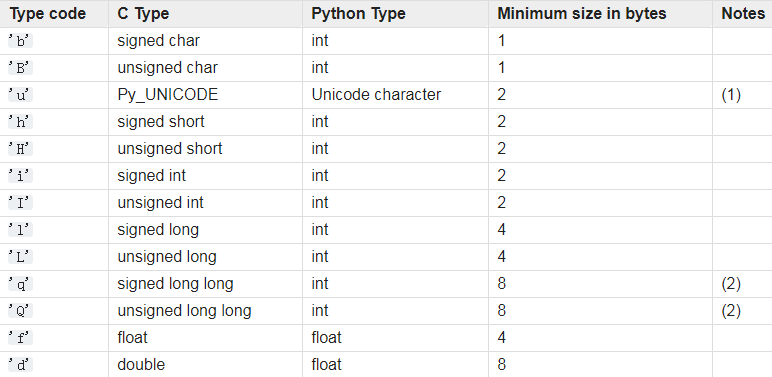

In [30]:
from array import array
from random import random
floats=array('d',(random() for i in range(10**7)))
floats[-1]

0.6042542967601301

In [56]:
fp = open('floats.bin', 'wb')
floats.tofile(fp)
fp.close()
floats2=array('d')
fp=open('floats.bin','rb')
floats2.fromfile(fp,10**7)
floats2[-1]
fp.close()

In [34]:
floats==floats2

True

### Memory views
A memoryview is essentially a generalized NumPy array structure in Python itself
(without the math). It allows you to share memory between data-structures (things like
PIL images, SQLlite databases, NumPy arrays, etc.) without first copying. This is very
important for large data sets.
Using notation similar to the array module, the memoryview.cast method lets you
change the way multiple bytes are read or written as units without moving bits
around — just like the C cast operator. memoryview.cast returns yet another memory
view object, always sharing the same memory.

In [37]:
from array import array
numbers = array('h', [-2, -1, 0, 1, 2])
memv = memoryview(numbers)
len(memv)

5

In [38]:
memv[0]

-2

In [39]:
memv_oct = memv.cast('B')
memv_oct.tolist()

[254, 255, 255, 255, 0, 0, 1, 0, 2, 0]

In [40]:
memv_oct[5] = 4
numbers

array('h', [-2, -1, 1024, 1, 2])

Meanwhile, if you are doing advanced numeric processing in arrays, then you should
be using the NumPy and SciPy libraries. We’ll take a brief look at them right away.
### NumPy and SciPy
SciPy is a library, written on top of NumPy, offering many scientific computing algorithms
from linear algebra, numerical calculus and statistics. SciPy is fast and reliable
because it leverages the widely-used C and Fortran codebase from the Netlib Repository.
In other words, SciPy gives scientists the best of both worlds: an interactive prompt
and high-level Python APIs, together with industrial-strength number crunching functions
optimized in C and Fortran.

In [41]:
import numpy as np
a=np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [42]:
type(a)

numpy.ndarray

In [43]:
a.shape

(12,)

In [45]:
a.shape=3,4
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [46]:
a[2]

array([ 8,  9, 10, 11])

In [48]:
a[:,1]

array([1, 5, 9])

In [49]:
a.transpose()

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

This was just an appetizer. NumPy and SciPy are formidable libraries, and are the foundation
of other awesome tools such as the Pandas and Blaze data analysis libraries, which
provide efficient array types that can to hold non-numeric data as well as import/export
functions compatible with many different formats like .csv, .xls, SQL dumps, HDF5
etc. These packages deserve entire books about them.
### Deques and other queues
The class collections.deque is a thread-safe double-ended queue designed for fast
inserting and removing from both ends. It is also the way to go if you need to keep a list
of “last seen items” or something like that, because a deque can be bounded — i.e. created
with a maximum length and then, when it is full, it discards items from the opposite
end when you append new ones.

In [50]:
from collections import deque
dq = deque(range(10), maxlen=10)
dq

deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
dq.rotate(3)
dq

deque([7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [52]:
dq.rotate(-4)
dq

deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

In [53]:
dq.appendleft(-1)
dq

deque([-1, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [54]:
dq.extend([11, 22, 33])
dq

deque([3, 4, 5, 6, 7, 8, 9, 11, 22, 33])

In [55]:
dq.extendleft([10, 20, 30, 40])
dq

deque([40, 30, 20, 10, 3, 4, 5, 6, 7, 8])

note that extendleft(iter) works by appending each successive item of the
iter argument to the left of the deque, therefore the final position of the items
is reversed.
The append and popleft operations are atomic, so deque is safe to use as a LIFO-queue
in multi-threaded applications without the need for using locks.

queue
Provides the synchronized (i.e. thread-safe) classes Queue, LifoQueue and Priori
tyQueue. These are used for safe communication between threads. All three classes
can be bounded by providing a maxsize argument greater than 0 to the constructor.
However, they don’t discard items to make room as deque does. Instead, when the
queue is full the insertion of a new item blocks — i.e. it waits until some other thread
makes room by taking an item from the queue, which is useful to throttle the number
of live threads.
multiprocessing
Implements its own bounded Queue, very similar to queue.Queue but designed for
inter-process communication. There is also has a specialized multiprocess
ing.JoinableQueue for easier task management.
asyncio
Newly added to Python 3.4, asyncio provides Queue, LifoQueue, PriorityQueue
and JoinableQueue with APIs inspired by the classes in queue and multiprocess
ing, but adapted for managing tasks in asynchronous programming.
heapq
In contrast to the previous three modules, heapq does not implement a queue class,
but provides functions like heappush and heappop that let you use a mutable sequence
as a heap queue or priority queue.

# CHAPTER 3 Dictionaries and sets
The dict type is not only widely used in our programs but also a fundamental part of
the Python implementation. Module namespaces, class and instance attributes and
function keyword arguments are some of the fundamental constructs where dictionaries
are deployed. The built-in functions live in __builtins__.__dict__.
Because of their crucial role, Python dicts are highly optimized. Hash tables are the
engines behind Python’s high performance dicts.
## Generic mapping types
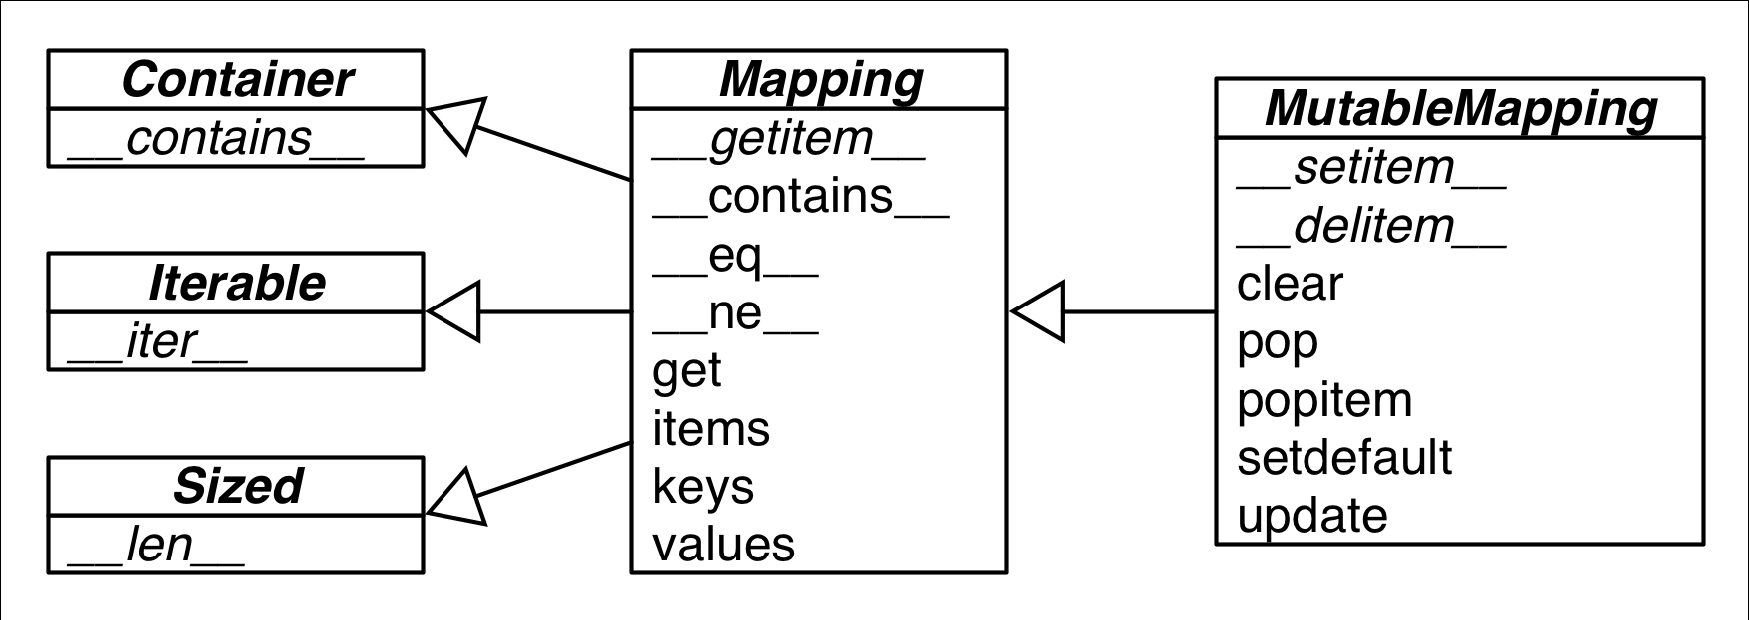
All mapping types in the standard library use the basic dict in their implementation,
so they share the limitation that the keys must be hashable (the values need not be
hashable, only the keys).

In [3]:
from collections import abc
my_dict = {}
isinstance(my_dict, abc.Mapping)

True

An object is hashable if it has a hash value which never changes during its lifetime (it
needs a __hash__() method), and can be compared to other objects (it needs an
__eq__() method). Hashable objects which compare equal must have the same hash
value. […]
The atomic immutable types (str, bytes, numeric types) are all hashable. A frozen
set is always hashable, because its elements must be hashable by definition. A tuple is
hashable only if all its items are hashable.

In [4]:
tt = (1, 2, (30, 40))
hash(tt)

8027212646858338501

In [5]:
tl = (1, 2, [30, 40])
hash(tl)

TypeError: unhashable type: 'list'

In [6]:
tf = (1, 2, frozenset([30, 40]))
hash(tf)

-4118419923444501110

User-defined types are hashable by default because their hash value is their id() and
they all compare not equal. If an object implements a custom __eq__ that takes into
account its internal state, it may be hashable only if all its attributes are immutable.

In [8]:
 a = dict(one=1, two=2, three=3)
 b = {'one': 1, 'two': 2, 'three': 3}
 c = dict(zip(['one', 'two', 'three'], [1, 2, 3]))
 d = dict([('two', 2), ('one', 1), ('three', 3)])
 e = dict({'three': 3, 'one': 1, 'two': 2})
 a == b == c == d == e

True

## dict comprehensions


In [9]:
DIAL_CODES = [
 (86, 'China'),
 (91, 'India'),
 (1, 'United States'),
 (62, 'Indonesia'),
 (55, 'Brazil'),
 (92, 'Pakistan'),
 (880, 'Bangladesh'),
 (234, 'Nigeria'),
 (7, 'Russia'),
 (81, 'Japan')]

country_code= {country: code for (code,country) in DIAL_CODES}
country_code
    

{'Bangladesh': 880,
 'Brazil': 55,
 'China': 86,
 'India': 91,
 'Indonesia': 62,
 'Japan': 81,
 'Nigeria': 234,
 'Pakistan': 92,
 'Russia': 7,
 'United States': 1}

In [11]:
{code:country.upper() for country,code in country_code.items() if code<66} 

{1: 'UNITED STATES', 7: 'RUSSIA', 55: 'BRAZIL', 62: 'INDONESIA'}

## Overview of common mapping methods
The basic API for mappings is quite rich. Table 3-1 shows the methods implemented
by dict and two of its most useful variations: defaultdict and OrderedDict, both
defined in the collections module.
### Handling missing keys with setdefault

In [35]:
import sys
import re
WORD_RE = re.compile('\w+')
index = {}
with open('zen.txt',encoding='utf-8') as fp:
    for line_no, line in enumerate(fp, 0):
        print(line_no,line)
        for match in WORD_RE.finditer(line):
            #print(match)
            word = match.group()
           # print(word)
            column_no = match.start()+1
            location = (line_no, column_no)
            #print(location)
            # this is ugly; coded like this to make a point
            #occurrences = index.get(word, [])
            #print(occurrences)
            #occurrences.append(location)
            #print(occurrences)
            #index[word] = occurrences
            #print(index)            
            index.setdefault(word, []).append(location)
for word in sorted(index, key=str.upper):
    print(word, index[word])  

0 ﻿On Tuesday, Amazon briefly became the second publicly traded company after Apple to reach $1 trillion in market cap.

1 

2 Although the stock closed below the magic number, it's remarkable how quickly it joined the trillion-dollar club. It 
1 [(0, 93)]
after [(0, 71)]
Although [(2, 1)]
Amazon [(0, 14)]
Apple [(0, 77)]
became [(0, 29)]
below [(2, 27)]
briefly [(0, 21)]
cap [(0, 114)]
closed [(2, 20)]
club [(2, 109)]
company [(0, 63)]
dollar [(2, 102)]
how [(2, 67)]
in [(0, 104)]
it [(2, 51), (2, 79)]
It [(2, 115)]
joined [(2, 82)]
magic [(2, 37)]
market [(0, 107)]
number [(2, 43)]
On [(0, 2)]
publicly [(0, 47)]
quickly [(2, 71)]
reach [(0, 86)]
remarkable [(2, 56)]
s [(2, 54)]
second [(0, 40)]
stock [(2, 14)]
the [(0, 36), (2, 10), (2, 33), (2, 89)]
to [(0, 83)]
traded [(0, 56)]
trillion [(0, 95), (2, 93)]
Tuesday [(0, 5)]


#### re.compile(pattern, flags=0)
Compile a regular expression pattern into a regular expression object, which can be used for matching using its match(), search() and other methods, described below.

The expression’s behaviour can be modified by specifying a flags value. Values can be any of the following variables, combined using bitwise OR (the | operator).
#### enumerate(iterable, start=0)
Return an enumerate object. iterable must be a sequence, an iterator, or some other object which supports iteration. The __next__() method of the iterator returned by enumerate() returns a tuple containing a count (from start which defaults to 0) and the values obtained from iterating over iterable.
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
list(enumerate(seasons))
[(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]
list(enumerate(seasons, start=1))
[(1, 'Spring'), (2, 'Summer'), (3, 'Fall'), (4, 'Winter')]
#### re.finditer(pattern, string, flags=0)
Return an iterator yielding match objects over all non-overlapping matches for the RE pattern in string. The string is scanned left-to-right, and matches are returned in the order found. Empty matches are included in the result. See also the note about findall().
#### match.group([group1, ...])
Returns one or more subgroups of the match. If there is a single argument, the result is a single string; if there are multiple arguments, the result is a tuple with one item per argument. Without arguments, group1 defaults to zero (the whole match is returned). If a groupN argument is zero, the corresponding return value is the entire matching string; if it is in the inclusive range [1..99], it is the string matching the corresponding parenthesized group. If a group number is negative or larger than the number of groups defined in the pattern, an IndexError exception is raised. If a group is contained in a part of the pattern that did not match, the corresponding result is None. If a group is contained in a part of the pattern that matched multiple times, the last match is returned.
#### get(key[, default])
Return the value for key if key is in the dictionary, else default. If default is not given, it defaults to None, so that this method never raises a KeyError.
#### setdefault(key[, default])
If key is in the dictionary, return its value. If not, insert key with a value of default and return default. default defaults to None.

In [17]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
list(enumerate(seasons))
list(enumerate(seasons, start=1))

[(1, 'Spring'), (2, 'Summer'), (3, 'Fall'), (4, 'Winter')]

In [25]:
m = re.match(r"(\w+) (\w+)", "Isaac Newton, physicist")
m.group(0)  

'Isaac Newton'

In [26]:
m.group(1)  

'Isaac'

In [27]:
m.group(2)  

'Newton'

## Mappings with flexible key lookup
Sometimes it is convenient to have mappings that return some made-up value when a
missing key is searched. There are two main approaches to this: one is to use a default
dict instead of a plain dict. The other is to subclass dict or any other mapping type
and add a __missing__ method.
#### defaultdict: another take on missing keys
A defaultdict is configured to create items on demand
whenever a missing key is searched.
Here is how it works: when instantiating a defaultdict, you provide a callable which
is used to produce a default value whenever __getitem__ is passed a non-existent key
argument.
For example, given an empty defaultdict created as dd = defaultdict(list), if
'new-key' is not in dd then the expression dd['new-key'] does the following steps:
1. calls list() to create a new list;
2. inserts the list into dd using 'new-key' as key;
3. returns a reference to that list.
The callable that produces the default values is held in an instance attribute called
default_factory.

In [2]:
import sys
import re
import collections
WORD_RE = re.compile('\w+')
index = collections.defaultdict(list)
with open('zen.txt', encoding='utf-8') as fp:
    for line_no, line in enumerate(fp, 1):
        for match in WORD_RE.finditer(line):
            word = match.group()
            column_no = match.start()+1
            location = (line_no, column_no)
            index[word].append(location)
# print in alphabetical order
for word in sorted(index, key=str.upper):
    print(word, index[word])

1 [(1, 93)]
after [(1, 71)]
Although [(3, 1)]
Amazon [(1, 14)]
Apple [(1, 77)]
became [(1, 29)]
below [(3, 27)]
briefly [(1, 21)]
cap [(1, 114)]
closed [(3, 20)]
club [(3, 109)]
company [(1, 63)]
dollar [(3, 102)]
how [(3, 67)]
in [(1, 104)]
it [(3, 51), (3, 79)]
It [(3, 115)]
joined [(3, 82)]
magic [(3, 37)]
market [(1, 107)]
number [(3, 43)]
On [(1, 2)]
publicly [(1, 47)]
quickly [(3, 71)]
reach [(1, 86)]
remarkable [(3, 56)]
s [(3, 54)]
second [(1, 40)]
stock [(3, 14)]
the [(1, 36), (3, 10), (3, 33), (3, 89)]
to [(1, 83)]
traded [(1, 56)]
trillion [(1, 95), (3, 93)]
Tuesday [(1, 5)]


The mechanism that makes defaultdict work by calling default_factory is actually
the __missing__ special method, a feature supported by all standard mapping types
that we discuss next.
### The __missing__ method
This method is not defined in the base dict class, but dict is aware of it: if you
subclass dict and provide a __missing__ method, the standard dict.__getitem__ will
call it whenever a key is not found, instead of raising KeyError.

In [9]:
class StrKeyDict0(dict):
    def __missing__(self, key):
        if isinstance(key, str):
            raise KeyError(key)
        return self[str(key)]
    def get(self, key, default=None):
        try:
            return self[key]
        except KeyError:
            return default
    def __contains__(self, key):
        return key in self.keys() or str(key) in self.keys()

In [12]:
d = StrKeyDict0([('2', 'two'), ('4', 'four')])
d['2']

'two'

In [13]:
d[2]

'two'

In [14]:
d[1]

KeyError: '1'

In [15]:
d.get(2)

'two'

In [16]:
d.get('2')

'two'

In [17]:
d.get('1')

In [19]:
d.get(1,'n/a')

'n/a'

In [20]:
2 in d

True

In [21]:
'2' in d

True

In [22]:
1 in d

False

#### isinstance(object, classinfo)
Return true if the object argument is an instance of the classinfo argument, or of a (direct, indirect or virtual) subclass thereof. If object is not an object of the given type, the function always returns false. If classinfo is a tuple of type objects (or recursively, other such tuples), return true if object is an instance of any of the types. If classinfo is not a type or tuple of types and such tuples, a TypeError exception is raised.
## Variations of dict
collections.OrderedDict
maintains keys in insertion order, allowing iteration over items in a predictable
order. The popitem method of an OrderedDict pops the first item by default, but
if called as my_odict.popitem(last=True), it pops the last item added.
collections.ChainMap
holds a list of mappings which can be searched as one. The lookup is performed on
each mapping in order, and succeeds if the key is found in any of them. This is useful
to interpreters for languages with nested scopes, where each mapping represents a
scope context.
collections.Counter
a mapping that holds an integer count for each key. Updating an existing key adds
to its count. This can be used to count instances of hashable objects (the keys) or
as a multiset — a set that can hold several occurrences of each element. Counter
implements the + and - operators to combine tallies, and other useful methods such
as most_common([n]), which returns an ordered list of tuples with the n most common
items and their counts;
collections.UserDict
a pure Python implementation of a mapping that works like a standard dict.

In [23]:
ct = collections.Counter('abracadabra')
ct 

Counter({'a': 5, 'b': 2, 'c': 1, 'd': 1, 'r': 2})

In [24]:
ct.update('aaaaazzz')
ct

Counter({'a': 10, 'b': 2, 'c': 1, 'd': 1, 'r': 2, 'z': 3})

## Subclassing UserDict.

In [25]:
import collections
class StrKeyDict(collections.UserDict):
    def __missing__(self, key):
        if isinstance(key, str):
            raise KeyError(key)
        return self[str(key)]
    def __contains__(self, key):
        return str(key) in self.data
    def __setitem__(self, key, item):
        self.data[str(key)] = item

Because UserDict subclasses MutableMapping, the remaining methods that make
StrKeyDict a full-fledged mapping are inherited from UserDict, MutableMapping or
Mapping. The latter have several useful concrete methods, in spite of being ABCs (abstract
base classes). Worth noting:
MutableMapping.update
This powerful method can be called directly but is also used by __init__ to load
the instance from other mappings, from iterables of (key, value) pairs and keyword
arguments. Because it uses self[key] = value to add items, it ends up calling
our implementation of __setitem__.
Mapping.get
## Immutable mappings
Since Python 3.3 the types module provides a wrapper class MappingProxyType which,
given a mapping, returns a mappingproxy instance that is a read-only but dynamic view
of the original mapping. This means that updates to the original mapping can be seen
in the mappingproxy, but changes cannot be made through it.

In [27]:
from types import MappingProxyType
d={1:'A'}
d_proxy=MappingProxyType(d)
d_proxy

mappingproxy({1: 'A'})

In [28]:
d_proxy[1]

'A'

In [30]:
d_proxy[2]='b'

TypeError: 'mappingproxy' object does not support item assignment

In [31]:
d[2]='b'
d

{1: 'A', 2: 'b'}

In [32]:
d_proxy

mappingproxy({1: 'A', 2: 'b'})

## Set theory
A set is a collection of unique objects. 
Set elements must be hashable. The set type is not hashable, but frozenset is, so you
can have frozenset elements inside a set.
In addition to guaranteeing uniqueness, the set types implement the essential set operations
as infix operators, so, given two sets a and b, a | b returns their union, a & b
computes the intersection, and a - b the difference. Smart use of set operations can
reduce both the line count and the run time of Python programs, at the same time
making code easier to read and reason about — by removing loops and lots of conditional
logic.
#### set literals
The syntax of set literals — {1}, {1, 2}, etc. — looks exactly like the math notation,
with one important exception: there’s no literal notation for the empty set, we must
remember to write set().
Don’t forget: to create an empty set, use the constructor without an
argument: set(). If you write {}, you’re creating an empty dict —
this hasn’t changed.
Literal set syntax like {1, 2, 3} is both faster and more readable than calling the
constructor e.g. set([1, 2, 3]). The latter form is slower because, to evaluate it, Python
has to look up the set name to fetch the constructor, then build a list and finally pass
it to the constructor. In contrast, to process the a literal like {1, 2, 3}, Python runs a
specialized BUILD_SET bytecode.

In [36]:
l = ['spam', 'spam', 'eggs', 'spam']
set(l)

{'eggs', 'spam'}

In [37]:
list(set(l))

['eggs', 'spam']

In [38]:
s={1}
type(s)

set

In [39]:
s

{1}

In [40]:
s.pop()

1

In [41]:
s

set()

In [43]:
from dis import dis
dis('{1}')

  1           0 LOAD_CONST               0 (1)
              2 BUILD_SET                1
              4 RETURN_VALUE


In [47]:
dis('set([1])')

  1           0 LOAD_NAME                0 (set)
              2 LOAD_CONST               0 (1)
              4 BUILD_LIST               1
              6 CALL_FUNCTION            1
              8 RETURN_VALUE


There is no special syntax to represent frozenset literals — they must be created by
calling the constructor. The standard string representation in Python 3 looks like a
frozenset constructor call.

In [48]:
frozenset(range(10))

frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9})

#### set comprehensions

In [49]:
from unicodedata import name
{chr(i) for i in range(32, 256) if 'SIGN' in name(chr(i),'')}

{'#',
 '$',
 '%',
 '+',
 '<',
 '=',
 '>',
 '¢',
 '£',
 '¤',
 '¥',
 '§',
 '©',
 '¬',
 '®',
 '°',
 '±',
 'µ',
 '¶',
 '×',
 '÷'}

#### Set operations
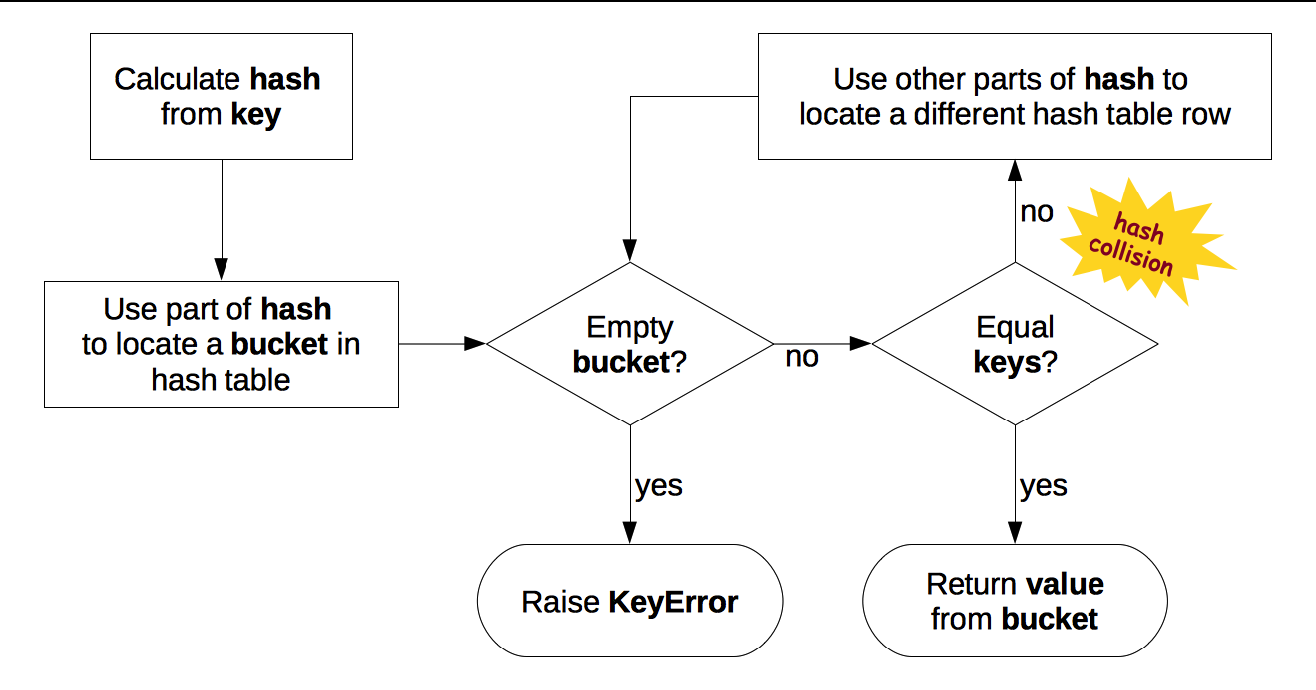
## dict and set under the hood
Understanding how Python dictionaries and sets are implemented using hash tables is
helpful to make sense of their strengths and limitations.
Here are some questions this section will answer:
• How efficient are Python dict and set?
• Why are they unordered?
• Why can’t we use any Python object as a dict key or set element?
• Why does the order of the dict keys or set elements depend on insertion order,
and may change during the lifetime of the structure?
• Why is it bad to add items to a dict or set while iterating through it?
#### A performance experiment
If your program does any kind of I/O, the lookup time for keys in dicts or sets is negligible,
regardless of the dict or set size (as long as it does fit in RAM).
#### Hash tables in dictionaries
A hash table is a sparse array, i.e. an array which always has empty cells. In standard
data structure texts, the cells in a hash table are often called “buckets”. In a dict hash
table, there is a bucket for each item, and it contains two fields: a reference to the key
and a reference to the value of the item. Because all buckets have the same size, access
to an individual bucket is done by offset.
Python tries to keep at least 1/3 of the buckets empty; if the hash table becomes too
crowded, it is copied to a new location with room for more buckets.
To put an item in a hash table the first step is to calculate the hash value of the item key,
which is done with the hash() built-in function
##### Hashes and equality
The hash() built-in function works directly with built-in types and falls back to calling
__hash__ for user-defined types. If two objects compare equal, their hash values must
also be equal, otherwise the hash table algorithm does not work. For example, because
1 == 1.0 is true, hash(1) == hash(1.0) must also be true, even though the internal
representation of an int and a float are very different7.
##### The hash table algorithm
To fetch the value at my_dict[search_key], Python calls hash(search_key) to obtain
the hash value of search_key and uses the least significant bits of that number as an
offset to look up a bucket in the hash table (the number of bits used depends on the
current size of the table). If the found bucket is empty, KeyError is raised. Otherwise,
the found bucket has an item — a found_key:found_value pair — and then Python
checks whether search_key == found_key. If they match, that was the item sought:
found_value is returned.
However, if search_key and found_key do not match, this is a hash collision. This happens
because a hash function maps arbitrary objects to a small number of bits, and —
in addition — the hash table is indexed with a subset of those bits. To resolve the collision,
the algorithm then takes different bits in the hash, massages them in a particular
way and uses the result as an offset to look up a different bucket8. If that is empty,
KeyError is raised; if not, either the keys match and the item value is returned, or the
collision resolution process is repeated.
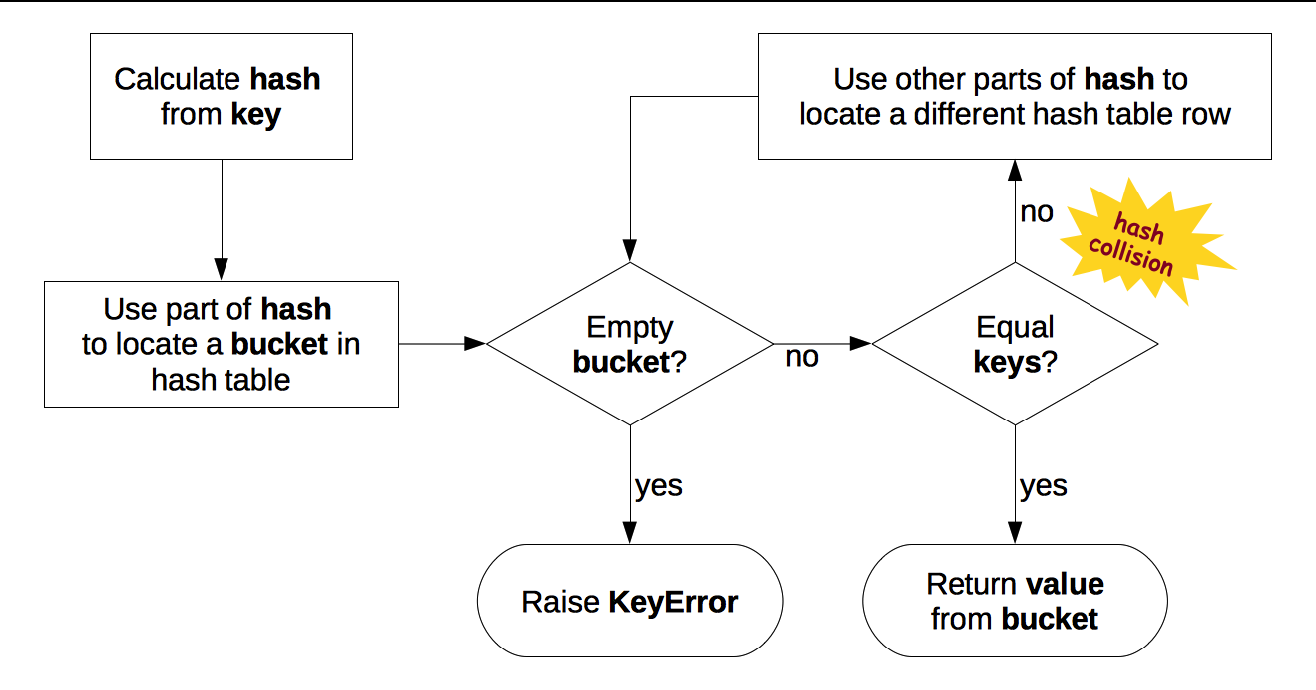
The process to insert or update an item is the same, except that when an empty bucket
is located, the new item is put there, and when a bucket with a matching key is found,
the value in that bucket is overwritten with the new value.
Additionally, when inserting items Python may determine that the hash table is too
crowded and rebuild it to a new location with more room. As the hash table grows, so
does the number of hash bits used as bucket offsets, and this keeps the rate of collisions
low.
### Practical consequences of how dict works
#1: Keys must be hashable objects
An object is hashable if all of these requirements are met:
1. It supports the hash() function via a __hash__() method that always returns the
same value over the lifetime of the object.
2. It supports equality via an __eq__() method.
3. If a == b is True then hash(a) == hash(b) must also be True.

User-defined types are hashable by default because their hash value is their id() and
they all compare not equal.

#2: dicts have significant memory overhead
Because a dict uses a hash table internally, and hash tables must be sparse to work, they
are not space efficient. For example, if you are handling a large quantity of records it
makes sense to store them in a list of tuples or named tuples instead of using a list of
dictionaries in JSON style, with one dict per record. Replacing dicts with tuples reduces
the memory usage in two ways: by removing the overhead of one hash table per record
and by not storing the field names again with each record.

#3: Key search is very fast
The dict implementation is an example of trading space for time: dictionaries have
significant memory overhead, but they provide fast access regardless of the size of the
dictionary — as long as it fits in memory.

#4: Key ordering depends on insertion order
When a hash collision happens, the second key ends up in a position that it would not
normally occupy if it had been inserted first. So, a dict built as dict([(key1, value1),
(key2, value2)]) compares equal to dict([(key2, value2), (key1, value1)]),
but their key ordering may not be the same if the hashes of key1 and key2 collide.

In [51]:
DIAL_CODES = [
(86, 'China'),
(91, 'India'),
(1, 'United States'),
(62, 'Indonesia'),
(55, 'Brazil'),
(92, 'Pakistan'),
(880, 'Bangladesh'),
(234, 'Nigeria'),
(7, 'Russia'),
(81, 'Japan'),
]
d1 = dict(DIAL_CODES)
print('d1:', d1.keys())
d2 = dict(sorted(DIAL_CODES))
print('d2:', d2.keys())
d3 = dict(sorted(DIAL_CODES, key=lambda x:x[1]))
print('d3:', d3.keys())
assert d1 == d2 and d2 == d3

d1: dict_keys([86, 91, 1, 62, 55, 92, 880, 234, 7, 81])
d2: dict_keys([1, 7, 55, 62, 81, 86, 91, 92, 234, 880])
d3: dict_keys([880, 55, 86, 91, 62, 81, 234, 92, 7, 1])


##### lambda
An anonymous inline function consisting of a single expression which is evaluated when the function is called. The syntax to create a lambda function is lambda [parameters]: expression
#5: Adding items to a dict may change the order of existing keys
Whenever you add a new item to a dict, the Python interpreter may decide that the
hash table of that dictionary needs to grow. This entails building a new, bigger hash
table, and adding all current items to the new table. During this process, new (but
different) hash collisions may happen, with the result that the keys are likely to be ordered
differently in the new hash table. All of this is implementation-dependent, so you
cannot reliably predict when it will happen. If you are iterating over the dictionay keys
and changing them at the same time, your loop may not scan all the items as expected
— not even the items that were already in the dictionary before you added to it.
This is why modifying the contents of a dict while iterating through it is a bad idea. If
you need to scan and add items to a dictionary, do it in two steps: read the dict from
start to finish and collect the needed additions in a second dict. Then update the first
one with it.
## How sets work — practical consequences
The set and frozenset types are also implemented with a hash table, except that each
bucket holds only a reference to the element (as if it were a key in a dict, but without
a value to go with it). In fact, before set was added to the language, we often used
dictionaries with dummy values just to perform fast membership tests on the keys.
Everything said in “Practical consequences of how dict works” on page 90 about how
the underlying hash table determines the behavior of a dict applies to a set. Without
repeating the previous section, we can summarize it for sets with just a few words:
1. Set elements must be hashable objects.
2. Sets have a significant memory overhead.
3. Membership testing is very efficient.
4. Element ordering depends on insertion order.
5. Adding elements to a set may change the order of other elements.

# CHAPTER 4 Text versus bytes
## Character issues
The concept of “string” is simple enough: a string is a sequence of characters. The problem
lies in the definition of “character”.
In 2014 the best definition of “character” we have is a Unicode character. Accordingly,
the items you get out of a Python 3 str are Unicode characters, just like the items of a
unicode object in Python 2 — and not the raw bytes you get from a Python 2 str.
The Unicode standard explicitly separates the identity of characters from specific byte
representations.
• The identity of a character — its code point — is a number from 0 to 1,114,111 (base
10), shown in the Unicode standard as 4 to 6 hexadecimal digits with a “U+” prefix.
For example, the code point for the letter A is U+0041, the Euro sign is U+20AC
and the musical symbol G clef is assigned to code point U+1D11E. About 10% of
the valid code points have characters assigned to them in Unicode 6.3, the standard
used in Python 3.4.
• The actual bytes that represent a character depend on the encoding in use. An encoding
is an algorithm that converts code points to byte sequences and vice-versa.
The code point for A (U+0041) is encoded as the single byte \x41 in the UTF-8
encoding, or as the bytes \x41\x00 in UTF-16LE encoding. As another example,
the Euro sign (U+20AC) becomes three bytes in UTF-8 — \xe2\x82\xac — but in
UTF-16LE it is encoded as two bytes: \xac\x20.
Converting from code points to bytes is encoding; from bytes to code points is decoding.

If you need a memory aid to distinguish .decode() from .en
code(), convince yourself that byte sequences can be cryptic machine
core dumps while Unicode str objects are “human” text .
Therefore, it makes sense that we decode bytes to str to get human
readable text, and we encode str to bytes for storage or transmission.

In [61]:
s = 'café'
len(s)

4

In [56]:
b=s.encode('utf-8')
b

b'caf\xc3\xa9'

In [57]:
len(b)

5

In [58]:
b.decode('utf-8')

'café'

## Byte essentials
The new binary sequence types are unlike the Python 2 str in many regards. The first
thing to know is that there are two basic built-in types for binary sequences: the immutable
bytes type introduced in Python 3 and the mutable bytearray, added in
Python 2.62.
Each item in bytes or bytearray is an integer from 0 to 255, and not a 1-character
string like in the Python 2 str. However a slice of a binary sequence always produces a
binary sequence of the same type — including slices of length 1.

In [62]:
cafe = bytes('café', encoding='utf_8')
cafe[0]

99

In [63]:
cafe[:1]

b'c'

In [67]:
ca= bytearray(cafe)
ca

bytearray(b'caf\xc3\xa9')

In [68]:
cafe[-1:]

bytearray(b'\xa9')

Although binary sequences are really sequences of integers, their literal notation reflects
the fact that ASCII text is often embedded in them. Therefore, three different displays
are used, depending on each byte value:
• For bytes in the printable ASCII range — from space to ~ — the ASCII character
itself is used.
• For bytes corresponding to tab, newline, carriage return and \, the escape sequences
\t, \n, \r and \\ are used.
• For every other byte value, an hexadecimal escape sequence is used, e.g. \x00 is the
null byte.
Both bytes and bytearray support every str method except those that do formatting
(format, format_map) and a few others that depend on Unicode data: casefold, isdec
imal, isidentifier, isnumeric, isprintable and encode. This means that you can
use familiar string methods like endswith, replace, strip, translate, upper and dozens
of others with binary sequences — only using bytes and not str arguments. In
addition, the regular expression functions in the re module also work on binary se‐
quences, if the regex is compiled from a binary sequence instead of a str.

Binary sequences have a class method that str doesn’t have: fromhex, which builds a
binary sequence by parsing pairs of hex digits optionally separated by space

In [69]:
bytes.fromhex('31 4B CE A9')

b'1K\xce\xa9'

The other ways of building bytes or bytearray instances are calling their constructors
with:
• a str and an encoding keyword argument.
• an iterable providing items with values from 0 to 255.
• a single integer, to create a binary sequence of that size initialized with null bytes3.
• an object that implements the buffer protocol (eg. bytes, bytearray, memoryview,
array.array); this copies the bytes from the source object to the newly created
binary sequence.
Building a binary sequence from a buffer-like object is a low-level operation that may
involve type casting.

In [70]:
import array
numbers = array.array('h', [-2, -1, 0, 1, 2])
octets = bytes(numbers)
octets

b'\xfe\xff\xff\xff\x00\x00\x01\x00\x02\x00'

### Structs and memory views


In [72]:
import struct
fmt = '<3s3sHH' #
with open('image001.png', 'rb') as fp:
    img = memoryview(fp.read()) #
header = img[:10] #
bytes(header) #

b'\x89PNG\r\n\x1a\n\x00\x00'

In [73]:
struct.unpack(fmt, header)

(b'\x89PN', b'G\r\n', 2586, 0)

In [74]:
del header

In [75]:
del img

## Basic encoders/decoders

In [1]:
for codec in ['latin_1', 'utf_8', 'utf_16']:
    print(codec, 'El Niño'.encode(codec), sep='\t')

latin_1	b'El Ni\xf1o'
utf_8	b'El Ni\xc3\xb1o'
utf_16	b'\xff\xfeE\x00l\x00 \x00N\x00i\x00\xf1\x00o\x00'


some encodings, like ASCII and even the
multi-byte GB2312, cannot represent every Unicode character. The UTF encodings,
however, are designed to handle every Unicode code point.

## Understanding encode/decode problems
### Coping with UnicodeEncodeError
Most non-UTF codecs handle only a small subset of the Unicode characters. When
converting text to bytes, if a character is not defined in the target encoding, UnicodeEn
codeError will be raised, unless special handling is provided by passing an errors
argument to the encoding method or function.

In [4]:
city = 'São Paulo'
city.encode('utf-8')

b'S\xc3\xa3o Paulo'

In [5]:
city.encode('utf_16')

b'\xff\xfeS\x00\xe3\x00o\x00 \x00P\x00a\x00u\x00l\x00o\x00'

In [6]:
city.encode('iso8859_1')

b'S\xe3o Paulo'

In [7]:
city.encode('cp437')

UnicodeEncodeError: 'charmap' codec can't encode character '\xe3' in position 1: character maps to <undefined>

In [8]:
city.encode('cp437', errors='ignore')

b'So Paulo'

In [9]:
city.encode('cp437', errors='replace')

b'S?o Paulo'

In [11]:
city.encode('cp437', errors='xmlcharrefreplace')

b'S&#227;o Paulo'

### Coping with UnicodeDecodeError
Not every byte holds a valid ASCII character, and not every byte sequence is valid UTF-8
or UTF-16, therefore when you assume one of these encodings while converting a binary
sequence to text, you will get a UnicodeDecodeError if unexpected bytes are found.

On the other hand, many legacy 8-bit encodings like 'cp1252', 'iso8859_1', 'koi8_r'
are able to decode any stream of bytes, including random noise, without generating
errors. Therefore, if your program assumes the wrong 8-bit encoding, it will silently
decode garbage.

In [13]:
octets = b'Montr\xe9al'
octets.decode('cp1252')

'Montréal'

In [14]:
octets.decode('iso8859_7')

'Montrιal'

In [15]:
octets.decode('koi8_r')

'MontrИal'

In [17]:
octets.decode('utf_8')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 5: invalid continuation byte

In [18]:
octets.decode('utf_8',errors='replace')

'Montr�al'

### SyntaxError when loading modules with unexpected encoding
UTF-8 is the default source encoding for Python 3, just as ASCII was the default for
Python 2 (starting with 2.5).
### How to discover the encoding of a byte sequence
Short answer: you can’t. You must be told.
### BOM: a useful gremlin

In [19]:
u16 = 'El Niño'.encode('utf_16')
u16

b'\xff\xfeE\x00l\x00 \x00N\x00i\x00\xf1\x00o\x00'

The bytes are: b'\xff\xfe'. That is a BOM — byte-order mark — denoting the “littleendian”
byte ordering of the Intel CPU where the encoding was performed.

In [20]:
list(u16)

[255, 254, 69, 0, 108, 0, 32, 0, 78, 0, 105, 0, 241, 0, 111, 0]

In [21]:
u16le = 'El Niño'.encode('utf_16le')
list(u16le)

[69, 0, 108, 0, 32, 0, 78, 0, 105, 0, 241, 0, 111, 0]

In [22]:
u16be = 'El Niño'.encode('utf_16be')
list(u16be)

[0, 69, 0, 108, 0, 32, 0, 78, 0, 105, 0, 241, 0, 111]

## Handling text files
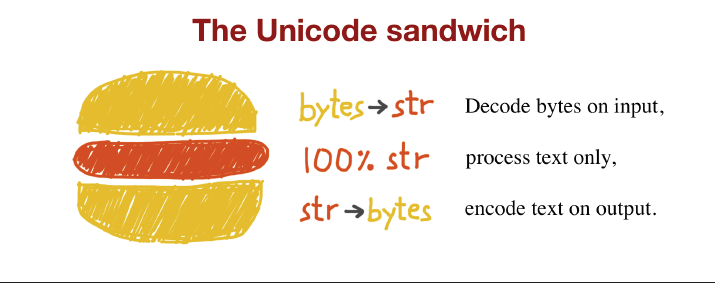
The best practice for handling text is the “Unicode sandwich” (Figure 4-2)8. This means
that bytes should be decoded to str as early as possible on input,
On output, the str are encoded to bytes as
late as possible.
Python 3 makes it easier to follow the advice of the Unicode sandwich, because the open
built-in does the necessary decoding when reading and encoding when writing files in
text mode, so all you get from my_file.read() and pass to my_file.write(text) are
str objects.

In [82]:
fp = open('cafe.txt', 'w',encoding='utf-8').write('café')
fp

4

In [83]:
open('cafe.txt').read()

'caf茅'

In [84]:
fp = open('cafe.txt', 'w').write('café')
fp

4

In [85]:
open('cafe.txt').read()

'café'

In [98]:
fp = open('cafe.txt', 'w', encoding='utf_8')
fp

<_io.TextIOWrapper name='cafe.txt' mode='w' encoding='utf_8'>

In [99]:
fp.write('café')
fp.close()

In [100]:
import os
os.stat('cafe.txt').st_size

5

In [101]:
fp2 = open('cafe.txt')
fp2

<_io.TextIOWrapper name='cafe.txt' mode='r' encoding='cp936'>

In [102]:
fp2.encoding

'cp936'

In [103]:
fp2.read()

'caf茅'

In [105]:
fp3 = open('cafe.txt', encoding='utf_8')
fp3

<_io.TextIOWrapper name='cafe.txt' mode='r' encoding='utf_8'>

In [106]:
fp3.read()

'café'

In [107]:
fp4 = open('cafe.txt', 'rb')
fp4

<_io.BufferedReader name='cafe.txt'>

In [108]:
fp4.read()

b'caf\xc3\xa9'

Do not open text files in binary mode unless you need to analyze the
file contents to determine the encoding — even then, you should be
using Chardet instead of reinventing the wheel. Ordinary code
should only use binary mode to open binary files, like raster images.
### Encoding defaults: a madhouse
Several settings affect the encoding defaults for I/O in Python.

In [114]:
import sys, locale
expressions = """
    locale.getpreferredencoding()
    type(my_file)
    my_file.encoding
    sys.stdout.isatty()
    sys.stdout.encoding
    sys.stdin.isatty()
    sys.stdin.encoding
    sys.stderr.isatty()
    sys.stderr.encoding
    sys.getdefaultencoding()
    sys.getfilesystemencoding()
"""
my_file = open('dummy', 'w')
for expression in expressions.split():
    value =eval(expression)
    print(expression.rjust(30), '->',repr(value))

 locale.getpreferredencoding() -> 'cp936'
                 type(my_file) -> <class '_io.TextIOWrapper'>
              my_file.encoding -> 'cp936'
           sys.stdout.isatty() -> False
           sys.stdout.encoding -> 'UTF-8'
            sys.stdin.isatty() -> False
            sys.stdin.encoding -> 'cp936'
           sys.stderr.isatty() -> False
           sys.stderr.encoding -> 'UTF-8'
      sys.getdefaultencoding() -> 'utf-8'
   sys.getfilesystemencoding() -> 'utf-8'


#### eval(expression, globals=None, locals=None)
The arguments are a string and optional globals and locals. If provided, globals must be a dictionary. If provided, locals can be any mapping object.

The expression argument is parsed and evaluated as a Python expression (technically speaking, a condition list) using the globals and locals dictionaries as global and local namespace. If the globals dictionary is present and does not contain a value for the key __builtins__, a reference to the dictionary of the built-in module builtins is inserted under that key before expression is parsed. This means that expression normally has full access to the standard builtins module and restricted environments are propagated. If the locals dictionary is omitted it defaults to the globals dictionary. If both dictionaries are omitted, the expression is executed in the environment where eval() is called. The return value is the result of the evaluated expression. Syntax errors are reported as exceptions. Example

#### repr(object)
Return a string containing a printable representation of an object. For many types, this function makes an attempt to return a string that would yield an object with the same value when passed to eval(), otherwise the representation is a string enclosed in angle brackets that contains the name of the type of the object together with additional information often including the name and address of the object. A class can control what this function returns for its instances by defining a __repr__() method.
----------------------
• If you omit the encoding argument when opening a file, the default is given by
locale.getpreferredencoding() ('cp1252' in Example 4-12).
• The encoding of sys.stdout/stdin/stderr is given by the https://docs.python.org/
3/using/cmdline.html#envvar-PYTHONIOENCODING [PYTHONIOENCODING] environment
variable, if present, otherwise it is either inherited from the console or
defined by locale.getpreferredencoding() if the output/input is redirected to/
from a file.
• sys.getdefaultencoding() is used internally by Python to convert binary data to/
from str; this happens less often in Python 3, but still happens10. Changing this
setting is not supported11.
• sys.getfilesystemencoding() is used to encode/decode file names (not file contents).
It is used when open() gets a str argument for the file name; if the file name
is given as a bytes argument, it is passed unchanged to the OS API. The Python
Unicode HOWTO says: “on Windows, Python uses the name mbcs to refer to whatever
the currently configured encoding is.” The acronym MBCS stands for Multi
Byte Character Set, which for Microsoft are the legacy variable-width encodings like gb2312 or Shift_JIS, but not UTF-8footnote

To summarize, the most important encoding setting is that returned by locale.get
preferredencoding(): it is the default for opening text files and for sys.stdout/stdin/
stderr when they are redirected to files. However, the documentation reads (in part):
locale.getpreferredencoding(do_setlocale=True)
Return the encoding used for text data, according to user preferences. User preferences
are expressed differently on different systems, and might not be available programmatically
on some systems, so this function only returns a guess. […]
Therefore, the best advice about encoding defaults is: do not rely on them.
If you follow the advice of the Unicode sandwich and always are explicit about the
encodings in your programs, you will avoid a lot of pain.

## Normalizing Unicode for saner comparisons



In [115]:
s1 = 'café'
s2 = 'cafe\u0301'
s1,s2

('café', 'café')

In [116]:
len(s1),len(s2)

(4, 5)

In [117]:
s1==s2

False

The code point U+0301 is the COMBINING ACUTE ACCENT. Using it after “e” renders “é”.
In the Unicode standard, sequences like 'é' and 'e\u0301' are called “canonical equivalents”,
and applications are supposed to treat them as the same. But Python sees two
different sequences of code points, and considers them not equal.
The solution is to use Unicode normalization, provided by the unicodedata.normal
ize function. The first argument to that function is one of four strings: 'NFC', 'NFD',
'NFKC' and 'NFKD'. Let’s start with the first two.
NFC (Normalization Form C) composes the code points to produce the shortest equivalent
string, while NFD decomposes, expanding composed characters into base characters
and separate combining characters. Both of these normalizations make comparisons
work as expected:

In [119]:
from unicodedata import normalize
s1 = 'café'
s2 = 'cafe\u0301'
len(normalize('NFC', s1)), len(normalize('NFC', s2))

(4, 4)

In [120]:
s1,s2

('café', 'café')

In [121]:
len(normalize('NFD', s1)), len(normalize('NFD', s2))

(5, 5)

In [122]:
normalize('NFC', s1) == normalize('NFC', s2)

True

In [123]:
normalize('NFC', s1)

'café'

In [124]:
normalize('NFD', s1)

'café'

In [125]:
normalize('NFD', s1) == normalize('NFD', s2)

True

Western keyboards usually generate composed characters, so text typed by users will be
in NFC by default. But to be safe it may be good to sanitize strings with normal
ize('NFC', user_text) before saving. NFC is also the normalization form recommended
by the W3C

In [126]:
from unicodedata import normalize, name
ohm = '\u2126'
name(ohm)

'OHM SIGN'

In [127]:
ohm_c = normalize('NFC', ohm)
name(ohm_c)

'GREEK CAPITAL LETTER OMEGA'

In [128]:
ohm == ohm_c

False

In [129]:
normalize('NFC', ohm) == normalize('NFC', ohm_c)

True

The letter K in the acronym for the other two normalization forms — NFKC and
NFKD — stands for “compatibility”. These are stronger forms of normalization, affecting
the so called “compatibility characters”. Although one goal of Unicode is to have a
single “canonical” code point for each character, some characters appear more than once
for compatibility with preexisting standards.

NFKC and NFKD normalization should be applied with care and
only in special cases — e.g. search and indexing — and not for permanent
storage, as these transformations cause data loss.

In [130]:
half = '½'
normalize('NFKC', half)

'1⁄2'

In [131]:
four_squared = '4²'
normalize('NFKC', four_squared)

'42'

In [132]:
micro = 'μ'
micro_kc = normalize('NFKC', micro)
micro, micro_kc

('μ', 'μ')

In [133]:
ord(micro), ord(micro_kc)

(956, 956)

In [134]:
name(micro), name(micro_kc)

('GREEK SMALL LETTER MU', 'GREEK SMALL LETTER MU')

### Case folding
Case folding is essentially converting all text to lowercase, with some additional transformations.
It is supported by the str.casefold() method (new in Python 3.3).

In [135]:
micro = 'μ'
name(micro)

'GREEK SMALL LETTER MU'

In [136]:
micro_cf = micro.casefold()
name(micro_cf)

'GREEK SMALL LETTER MU'

In [137]:
micro,micro_cf

('μ', 'μ')

In [138]:
eszett = 'ß'

In [139]:
name(eszett)

'LATIN SMALL LETTER SHARP S'

In [140]:
eszett_cf = eszett.casefold()

In [141]:
eszett,eszett_cf

('ß', 'ss')

As of Python 3.4 there are 116 code points for which str.casefold() and str.low
er() return different results. That’s 0.11% of a total of 110,122 named characters in
Unicode 6.3.

### Utility functions for normalized text matching

In [142]:
from unicodedata import normalize
def nfc_equal(str1, str2):
    return normalize('NFC', str1) == normalize('NFC', str2)
def fold_equal(str1, str2):
    return (normalize('NFC', str1).casefold() ==normalize('NFC', str2).casefold())

In [143]:
s1 = 'café'
s2 = 'cafe\u0301'
s1 == s2

False

In [144]:
nfc_equal(s1, s2)

True

In [145]:
nfc_equal('A', 'a')

False

In [146]:
s3 = 'Straße'
s4 = 'strasse'
s3==s4

False

In [147]:
nfc_equal(s3, s4)

False

In [148]:
fold_equal(s3, s4)

True

In [149]:
fold_equal(s1, s2)

True

In [150]:
fold_equal('A', 'a')

True

#### Extreme “normalization”: taking out diacritics
unicodedata.combining(chr)
Returns the canonical combining class assigned to the character chr as integer. Returns 0 if no combining class is defined.

In [152]:
import unicodedata
import string
def shave_marks(txt):
    """Remove all diacritic marks"""
    norm_txt = unicodedata.normalize('NFD', txt)
    shaved = ''.join(c for c in norm_txt    if not unicodedata.combining(c))
    return unicodedata.normalize('NFC', shaved)

In [153]:
order = '“Herr Voß: • ½ cup of OEtker™ caffè latte • bowl of açaí.”'
shave_marks(order)

'“Herr Voß: • ½ cup of OEtker™ caffe latte • bowl of acai.”'

In [154]:
Greek = 'Ζέφυρος, Zéfiro'
shave_marks(Greek)

'Ζεφυρος, Zefiro'

The function shave_marks from Example 4-14 works all right, but maybe it goes too
far. Often the reason to remove diacritics is to change Latin text to pure ASCII, but
shave_marks also changes non-Latin characters — like Greek letters — which will never
become ASCII just by losing their accents. So it makes sense to analyze each base character
and to remove attached marks only if the base character is a letter from the Latin
alphabet.

In [155]:
def shave_marks_latin(txt):
    """Remove all diacritic marks from Latin base characters"""
    norm_txt = unicodedata.normalize('NFD', txt)
    latin_base = False
    keepers = []
    for c in norm_txt:
        if unicodedata.combining(c) and latin_base:
            continue # ignore diacritic on Latin base char
        keepers.append(c)
        # if it isn't combining char, it's a new base char
        if not unicodedata.combining(c):
            latin_base = c in string.ascii_letters
    shaved = ''.join(keepers)
    return unicodedata.normalize('NFC', shaved)

## Sorting Unicode text